# Importing Neccessary Libararies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Loading The Dataset

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')
df.shape

(7022, 20)

# Checking Missing Values in Columns

In [3]:
# Check for missing values
df.isnull().sum()

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

# Removing Missing Values

In [4]:
df.dropna(inplace=True)

In [5]:
# Check for missing values
df.isnull().sum()


Age                            0
Course                         0
Gender                         0
CGPA                           0
Stress_Level                   0
Depression_Score               0
Anxiety_Score                  0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Relationship_Status            0
Substance_Use                  0
Counseling_Service_Use         0
Family_History                 0
Chronic_Illness                0
Financial_Stress               0
Extracurricular_Involvement    0
Semester_Credit_Load           0
Residence_Type                 0
dtype: int64

In [6]:
df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
5,21,Medical,Female,3.35,2,4,3,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus


# Removing Unneccessary Columns

In [7]:
# List of columns to exclude
columns_to_exclude = ['Relationship_Status', 'Residence_Type','Course']
df = df.drop(columns=columns_to_exclude)
df

,Age,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load
0,25,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Never,Never,No,No,2,Moderate,17
1,24,Female,2.44,0,3,0,Average,Low,Average,Low,Occasionally,Occasionally,No,No,3,Low,27
2,19,Female,3.74,4,0,3,Good,Low,Average,Moderate,Never,Occasionally,No,No,4,High,15
4,18,Male,3.40,3,3,4,Good,Low,Average,High,Never,Never,No,Yes,0,High,23
5,21,Female,3.35,2,4,3,Good,Moderate,Good,High,Never,Never,No,No,5,Moderate,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,20,Female,3.33,1,1,1,Average,Low,Average,Moderate,Never,Occasionally,No,No,3,Moderate,29
7017,20,Female,3.69,3,1,5,Good,Low,Poor,High,Never,Frequently,Yes,No,1,High,26
7018,24,Female,3.73,3,4,1,Good,Moderate,Average,High,Never,Occasionally,No,No,3,Low,15
7019,26,Male,3.65,4,5,1,Good,High,Poor,Moderate,Never,Occasionally,No,Yes,4,Moderate,17


# Converting String Categorical Variables Into Numerical Values in Order

In [8]:
# Get all the string variables
cat = df.select_dtypes(include='object')
for i in ['Family_History','Chronic_Illness']:
    cat[i] = cat[i].replace({'Yes':1,'No':0})
for i in ['Physical_Activity','Social_Support','Extracurricular_Involvement']:
    cat[i] = cat[i].replace({'Low':1,'Moderate':2,'High':3})
for i in ['Sleep_Quality','Diet_Quality']:
    cat[i] = cat[i].replace({'Poor':1,'Average':2,'Good':3})
for i in ['Substance_Use','Counseling_Service_Use']:
    cat[i] = cat[i].replace({'Never':0,'Occasionally':1,'Frequently':2})

cat['Gender'] = cat['Gender'].replace({'Male':1,'Female':0})
cat.head()

,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement
0,1,3,2,3,2,0,0,0,0,2
1,0,2,1,2,1,1,1,0,0,1
2,0,3,1,2,2,0,1,0,0,3
4,1,3,1,2,3,0,0,0,1,3
5,0,3,2,3,3,0,0,0,0,2


# Get all the numerical variable columns

In [9]:
# Get all the numerical variables
num = df.select_dtypes(include=np.number)
num.head()


,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
0,25,3.56,3,3,2,2,17
1,24,2.44,0,3,0,3,27
2,19,3.74,4,0,3,4,15
4,18,3.40,3,3,4,0,23
5,21,3.35,2,4,3,5,19


# Joining the two string and numerical(converted to numerical) into one single dataframe for scaling.

In [10]:
# Joining the two string and numerical(converted to numerical) into one single dataframe for scaling. 
df=pd.concat([cat,num],axis=1)
df.head()

,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
0,1,3,2,3,2,0,0,0,0,2,25,3.56,3,3,2,2,17
1,0,2,1,2,1,1,1,0,0,1,24,2.44,0,3,0,3,27
2,0,3,1,2,2,0,1,0,0,3,19,3.74,4,0,3,4,15
4,1,3,1,2,3,0,0,0,1,3,18,3.40,3,3,4,0,23
5,0,3,2,3,3,0,0,0,0,2,21,3.35,2,4,3,5,19


# Feature Scaling

In [11]:
df.columns
scale=['Sleep_Quality', 'Physical_Activity',
       'Diet_Quality', 'Social_Support','Extracurricular_Involvement','Age', 'CGPA', 'Depression_Score', 'Anxiety_Score',
       'Financial_Stress', 'Semester_Credit_Load']
scale

['Sleep_Quality',
 'Physical_Activity',
 'Diet_Quality',
 'Social_Support',
 'Extracurricular_Involvement',
 'Age',
 'CGPA',
 'Depression_Score',
 'Anxiety_Score',
 'Financial_Stress',
 'Semester_Credit_Load']

In [12]:
scaler = MinMaxScaler()
df[scale] = scaler.fit_transform(df[scale])
df.head()

,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
0,1,1.0,0.5,1.0,0.5,0,0,0,0,0.5,0.411765,0.717949,3,0.6,0.4,0.4,0.142857
1,0,0.5,0.0,0.5,0.0,1,1,0,0,0.0,0.352941,0.000000,0,0.6,0.0,0.6,0.857143
2,0,1.0,0.0,0.5,0.5,0,1,0,0,1.0,0.058824,0.833333,4,0.0,0.6,0.8,0.000000
4,1,1.0,0.0,0.5,1.0,0,0,0,1,1.0,0.000000,0.615385,3,0.6,0.8,0.0,0.571429
5,0,1.0,0.5,1.0,1.0,0,0,0,0,0.5,0.176471,0.583333,2,0.8,0.6,1.0,0.285714


# Checking the class distribution of Stress Level

In [13]:
# Checking the class distribution of Stress Level
class_distribution = df['Stress_Level'].value_counts()

print("Class Distribution:\n", class_distribution)

Class Distribution:
 Stress_Level
3    1397
2    1274
1    1226
0    1094
5    1013
4     991
Name: count, dtype: int64


# Splitting the Data into Training and Testing Sets

In [14]:
# Seperating Features
X = df.drop(['Stress_Level'], axis=1)
y = df['Stress_Level']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function for plotting confusion matrix

In [16]:
#confusion matrix diagram plotting function
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model_name.classes_, yticklabels=model_name.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Decision Tree Classifier

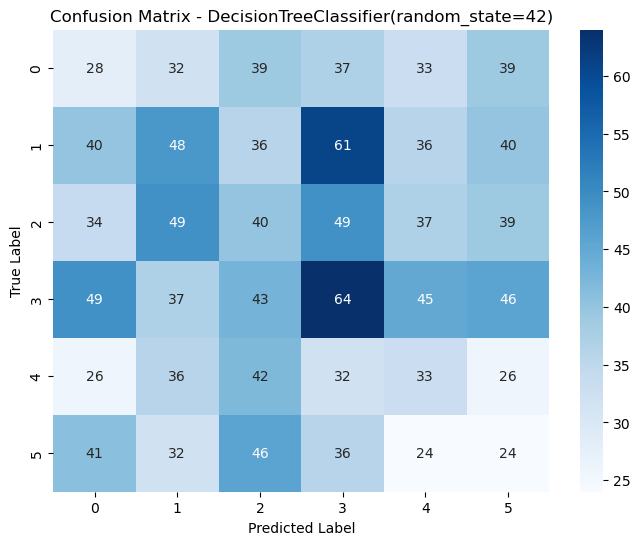


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.13      0.13       208
           1       0.21      0.18      0.19       261
           2       0.16      0.16      0.16       248
           3       0.23      0.23      0.23       284
           4       0.16      0.17      0.16       195
           5       0.11      0.12      0.12       203

    accuracy                           0.17      1399
   macro avg       0.17      0.17      0.17      1399
weighted avg       0.17      0.17      0.17      1399



In [17]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Confusion Matrix and Classification Report
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)

# Decision Tree
plot_confusion(y_test, dt_predictions, dt_model)
print("\nDecision Tree Classification Report:\n", dt_classification_report)


# Hyperparameter Tuning for DecisionTree Classifier 

In [18]:
# Define the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display the results
print("Hyperparameter Tuning Results:")
print(results_df[['params', 'mean_test_score']])

# Get the best parameters and corresponding mean accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Parameters:", best_params)
print("Best Mean Accuracy:", best_score)


Hyperparameter Tuning Results:
                                                params  mean_test_score
0    {'criterion': 'gini', 'max_depth': None, 'min_...         0.162436
1    {'criterion': 'gini', 'max_depth': None, 'min_...         0.165653
2    {'criterion': 'gini', 'max_depth': None, 'min_...         0.166368
3    {'criterion': 'gini', 'max_depth': None, 'min_...         0.170837
4    {'criterion': 'gini', 'max_depth': None, 'min_...         0.167262
..                                                 ...              ...
103  {'criterion': 'entropy', 'max_depth': 50, 'min...         0.167620
104  {'criterion': 'entropy', 'max_depth': 50, 'min...         0.175124
105  {'criterion': 'entropy', 'max_depth': 50, 'min...         0.173873
106  {'criterion': 'entropy', 'max_depth': 50, 'min...         0.173873
107  {'criterion': 'entropy', 'max_depth': 50, 'min...         0.173694

[108 rows x 2 columns]

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2

# Naive Bayes Classifiier

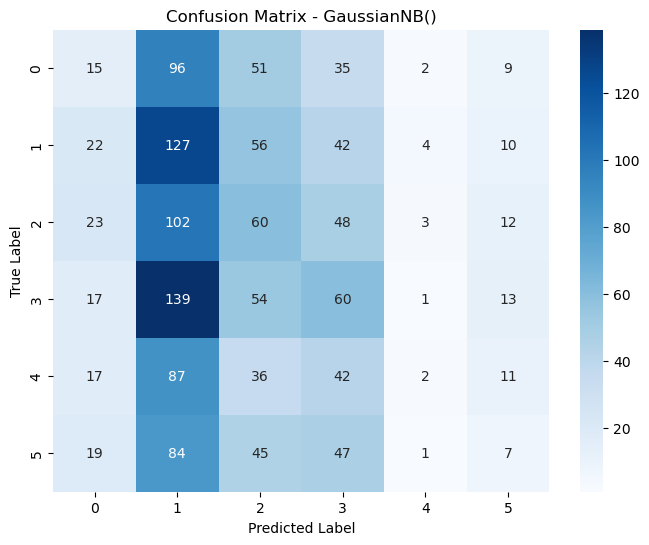


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.07      0.09       208
           1       0.20      0.49      0.28       261
           2       0.20      0.24      0.22       248
           3       0.22      0.21      0.22       284
           4       0.15      0.01      0.02       195
           5       0.11      0.03      0.05       203

    accuracy                           0.19      1399
   macro avg       0.17      0.18      0.15      1399
weighted avg       0.17      0.19      0.16      1399



In [19]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Confusion Matrix and Classification Report
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
nb_classification_report = classification_report(y_test, nb_predictions)

plot_confusion(y_test, nb_predictions, nb_model)
print("\nNaive Bayes Classification Report:\n", nb_classification_report)


# There are no hyperparameters for Naive Bayes

# Support Vector Machine(SVM) Classifier

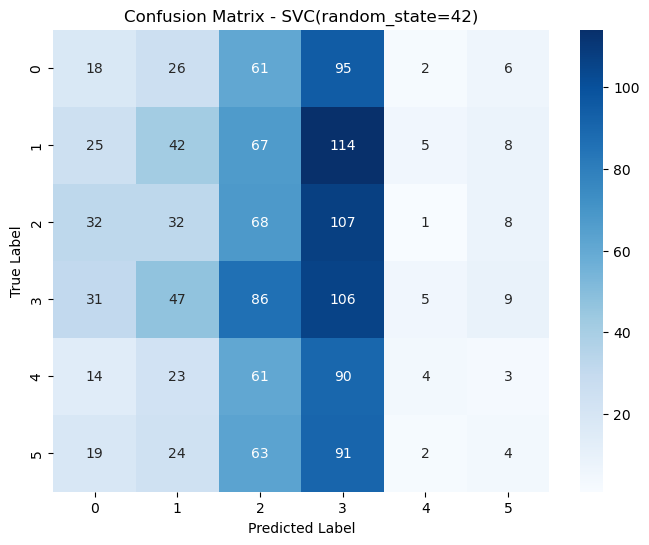


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.09      0.10       208
           1       0.22      0.16      0.18       261
           2       0.17      0.27      0.21       248
           3       0.18      0.37      0.24       284
           4       0.21      0.02      0.04       195
           5       0.11      0.02      0.03       203

    accuracy                           0.17      1399
   macro avg       0.17      0.16      0.13      1399
weighted avg       0.17      0.17      0.15      1399



In [20]:

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Confusion Matrix and Classification Report
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions,zero_division=1)


plot_confusion(y_test, svm_predictions, svm_model)
print("\nSVM Classification Report:\n", svm_classification_report)

# Hyperparameter Tuning For Support Vector Machine(SVM) Classifier

In [21]:
# Define the parameter grid for tuning
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000]}

# Create an SVM model
svm_model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display the results
print("Hyperparameter Tuning Results:")
print(results_df[['params', 'mean_test_score']])

# Get the best parameters and corresponding mean accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Parameters:", best_params)
print("Best Mean Accuracy:", best_score)


Hyperparameter Tuning Results:
        params  mean_test_score
0   {'C': 0.1}         0.200500
1   {'C': 0.5}         0.197820
2     {'C': 1}         0.193176
3     {'C': 5}         0.183168
4    {'C': 10}         0.181201
5    {'C': 50}         0.174767
6   {'C': 100}         0.169408
7   {'C': 500}         0.168872
8  {'C': 1000}         0.170122
9  {'C': 5000}         0.171909

Best Parameters: {'C': 0.1}
Best Mean Accuracy: 0.20050044682752458


# Correlation Mattrix Heap Plot to Determine Dataset's Weakness

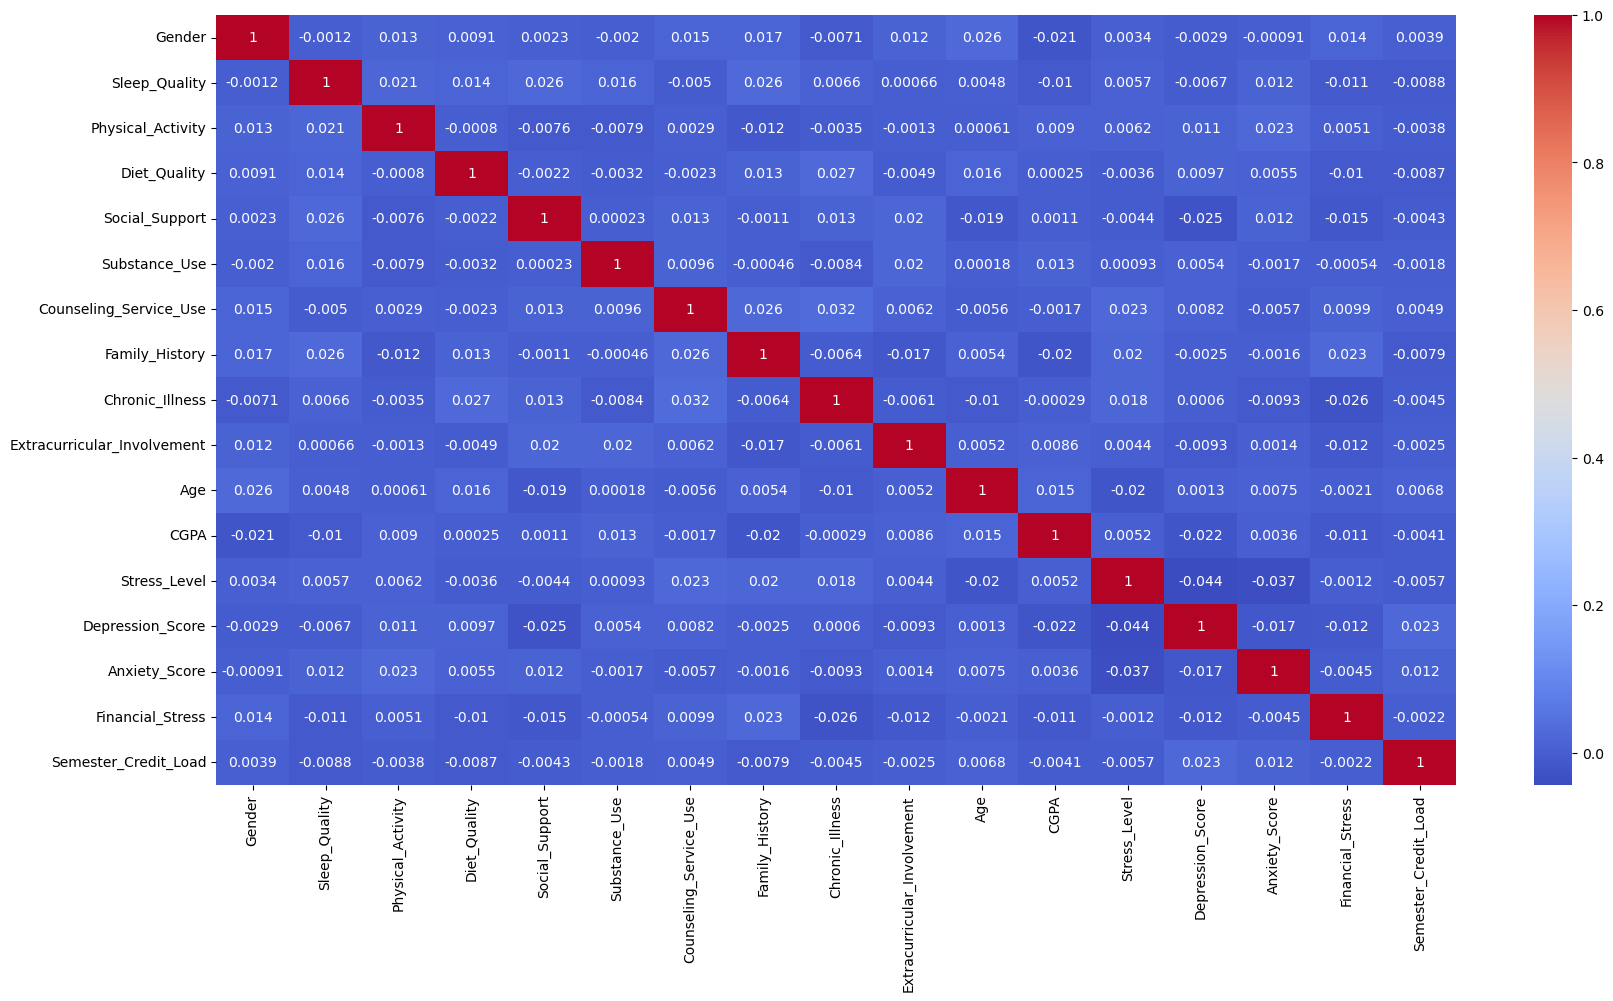

In [22]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()